# Strategy with RSI

In order to create the strategy of this section, we are going to import a new library which is the ta (technical analysis) library. The strategy will be created using the RSI indicator (detailed description in the next box).

### Content
- Explanation and computation of the RSI
- Do a strategy with the RSI
- Automate the strategy

In [2]:
!pip install ta
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=a2107bcc719c91375269f7c12b43f1447580022af3d9db62d071432eff14eabb
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
  Attem

In [3]:
# import library
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
import ta
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")

In [4]:
# The code here will allow you to switch your graphics to dark mode for those who choose to code in dark mode
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor = '#313233')
plt.rc('axes', facecolor = '#313233', edgecolor = 'none',
       axisbelow = True, grid = True, prop_cycle = colors,
       labelcolor = 'gray')

plt.rc('grid', color = '474A4A', linestyle = 'solid')
plt.rc('xtick', color = 'gray')
plt.rc('ytick', direction = 'out', color = 'gray')
plt.rc('legend', facecolor = '#313233', edgecolor = '#313233')
plt.rc('text', color = '#C9C9C9')
plt.rc('figure', facecolor = "#313233")

# Section 1: Explanation and computation of the RSI



The RSI (Relative Strength Index) will allow you to understand the strength of a trend and identify the end of a trend. The RSI value will vary from 0 to 100.
- If the RSI is around the level 70, it is assumed that the instrument is overbought. This is a situation where prices have risen sharply, and the movement is likely to weaken.
- If the RSI is around the level 30, this is a technical signal that the instrument may be oversold. In this case, it is a situation where prices have fallen sharply, and the movement may now lose strength.
- If the indicator oscillates horizontally around the level 50, it means that the market is lacking a trend. The level 50 is the middle line that separates the bullish and bearish territories of the indicator...

It should be taken into account that the RSI is an indicator family, so it will work a little less well in markets with less votality, such as the stock market.

In [5]:
# import the data
f = yf.download("GOOG")
f

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600
2023-02-14,94.660004,95.175003,92.650002,94.949997,94.949997,42513100
2023-02-15,94.739998,97.339996,94.360001,97.099998,97.099998,37029900


In [6]:
# compute the RSI
f["rsi"] = ta.momentum.RSIIndicator(f["Adj Close"], window = 14).rsi()         # window : look back period of RSI formular, 14 means the past 14 days
f

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,NaN
...,...,...,...,...,...,...,...
2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,45.985716
2023-02-14,94.660004,95.175003,92.650002,94.949997,94.949997,42513100,45.917640
2023-02-15,94.739998,97.339996,94.360001,97.099998,97.099998,37029900,49.387097


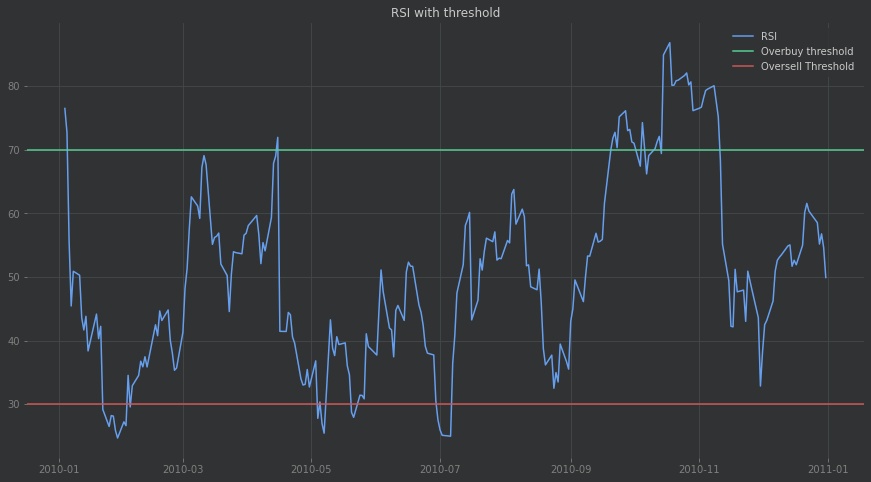

In [7]:
# Plot the RSI with the overbuy and overall threshold

# Adapt the size of the graph
plt.figure(figsize=(15,8))

# View the RSI of the year 2010 only
plt.plot(f["rsi"].loc["2010"])

# View horizontal line for the Overbuy threshold (RSI = 70)
plt.axhline(70, color= "#57CE95")

# View horizontal line for the Oversell threshold (RSI = 30)
plt.axhline(30, color = "#CE5757")

# Put a title
plt.title("RSI with threshold")

# Put a legend
plt.legend(["RSI", "Overbuy threshold", "Oversell Threshold"])

# Show the graph
plt.show()

Additional reading: https://www.investopedia.com/terms/r/rsi.asp

# Session 2: Do a strategy with the RSI

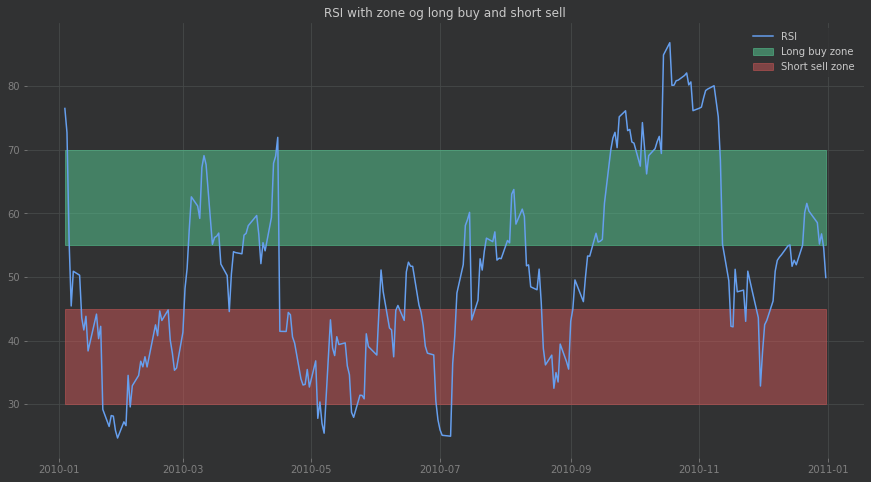

In [8]:
# Plot the RSI with the Long buy zone and Short sell zone

# Adapt the size of the graph
plt.figure(figsize = (15, 8))

# View the RSI of the year 2010
plt.plot(f["rsi"].loc["2010"])

# View horizontal line for the Overbuy threshold (RSI = 70)
plt.fill_between(f["rsi"].loc["2010"].index, 55, 70, 55 < 70, color = "#57CE95", alpha = 0.5)

# View horizontal line for the Oversell threshold (RSI = 30)
plt.fill_between(f["rsi"].loc["2010"].index, 45, 30, 30 < 45, color = "#CE5757", alpha = 0.5)

# put a title
plt.title("RSI with zone og long buy and short sell")

# put a legend
plt.legend(["RSI", "Long buy zone", "Short sell zone"])

# Show the graph
plt.show()

Buying signals:

In [9]:
# We define when the strategy must take a long buy or a short sell

# We need to define the Open Long signal and Close Long signal

# We put a threshold
overbuy = 70
neutral_buy = 55

# Put NaN values for the signal long columns
f["signal_long"] = np.nan
f["yesterday_rsi"] = f["rsi"].shift(1)

# We need to define when to open the Long signal (RSI yesterday < 55 and RSI today > 55)
f.loc[(f["rsi"] > neutral_buy) & (f["yesterday_rsi"] < neutral_buy), "signal_long"] = 1

# We need to define when to close the Long signal (RSI yesterday > 55 and RSI today < 55) False signal
f.loc[(f["rsi"] < neutral_buy) & (f["yesterday_rsi"] > neutral_buy), "signal_long"] = 0

# We need to close the Long signal when the rsi value passing the overbought threshold (RSI yesterday > 70 and RSI today < 70) Over buy signal
f.loc[(f["rsi"] < overbuy) & (f["yesterday_rsi"] > overbuy), "signal_long"] = 0

f

,Open,High,Low,Close,Adj Close,Volume,rsi,signal_long,yesterday_rsi
Date,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,45.985716,NaN,45.776716
2023-02-14,94.660004,95.175003,92.650002,94.949997,94.949997,42513100,45.917640,NaN,45.985716
2023-02-15,94.739998,97.339996,94.360001,97.099998,97.099998,37029900,49.387097,NaN,45.917640


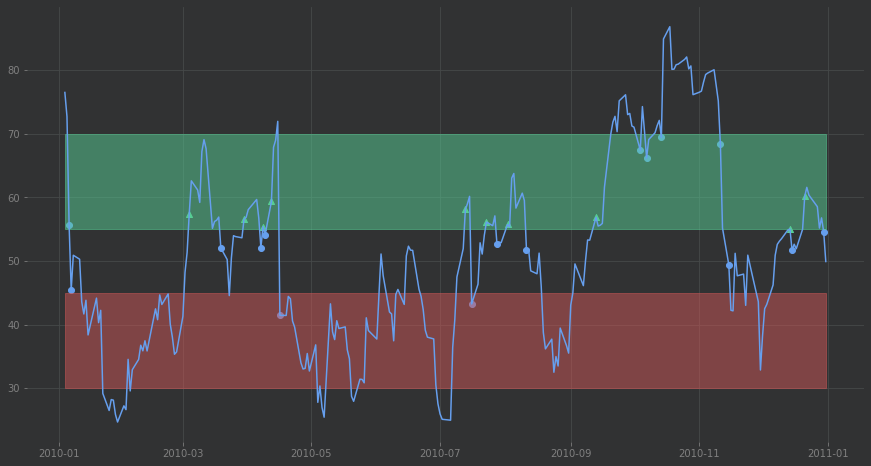

In [10]:
# We need to plot the signal to make sure that they are correct

# Select all signal in an index list to plot
idx_open = f.loc[f["signal_long"] == 1].loc["2010"].index
idx_close = f.loc[f["signal_long"] == 0].loc["2010"].index

# Adapt the size of the graph
plt.figure(figsize = (15, 8))

# Plot the points of the Open Long signal in green
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2010"], color = "#57CE95", marker = "^")

# Plot the points of the Close Long signal in blue
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2010"], color = "#669FEE", marker = "o")

# View horizontal line for the Overbuy threshold (RSI = 70)
plt.fill_between(f["rsi"].loc["2010"].index, 55, 70, 55 < 70, color = "#57CE95", alpha = 0.5)

# View horizontal line for the Oversell threshold (RSI = 30)
plt.fill_between(f["rsi"].loc["2010"].index, 45, 30, 30 < 45, color = "#CE5757", alpha = 0.5)

# Plot the rsi to be sure that the conditions are completed
plt.plot(f["rsi"].loc["2010"])

# Show the graph
plt.show()

Selling signals:

In [20]:
# We define when the strategy must take a long buy or a short sell

# ==============================================================================
# We need to define when to open Short signal and when to close the Short signal

# threshold defining
oversell = 30
neutral_sell = 45

# Put NaN values for the signal short columns
f["signal_short"] = np.nan
f["yesterday_rsi"] = f["rsi"].shift(1)

# We need to define when to open the Short signal (RSI yesterday > 45 and RSI today < 45)
f.loc[(f["rsi"] < neutral_sell) & (f["yesterday_rsi"] > neutral_sell), "signal_short"] = -1

# We need to define when to close the Short signal (RSI yesterday < 45 and RSI today > 45) False signal
f.loc[(f["rsi"] > neutral_sell) & (f["yesterday_rsi"] < neutral_sell), "signal_short"] = 0

# We need to close the Short signal when the rsi value passing the oversell threshold (RSI yesterday < 30 and RSI today > 70) Over Sell signal
f.loc[(f["rsi"] > oversell) & (f["yesterday_rsi"] < oversell), "signal_short"] = 0

f

,Open,High,Low,Close,Adj Close,Volume,rsi,signal_long,yesterday_rsi,signal_short,position
Date,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN,NaN,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,45.985716,NaN,45.776716,NaN,0.0
2023-02-14,94.660004,95.175003,92.650002,94.949997,94.949997,42513100,45.917640,NaN,45.985716,NaN,0.0
2023-02-15,94.739998,97.339996,94.360001,97.099998,97.099998,37029900,49.387097,NaN,45.917640,NaN,0.0


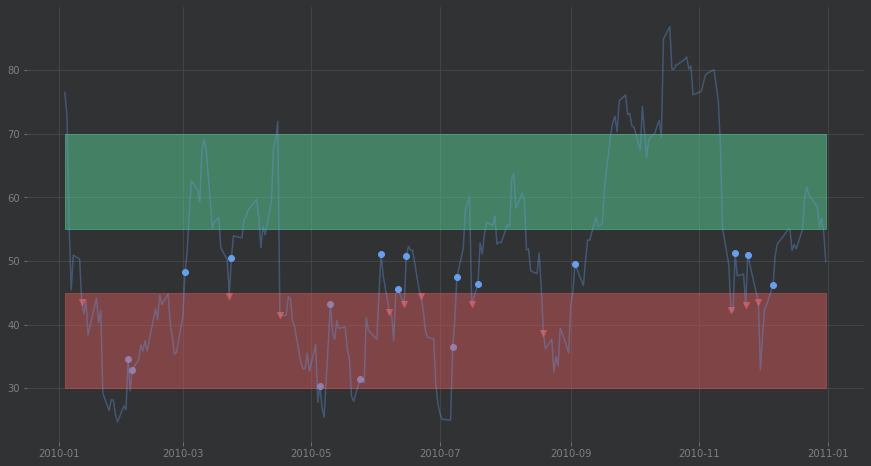

In [21]:
# We need to plot the signal to make sure that they are correct

# Select all signal in an index list to plot
idx_open = f.loc[f["signal_short"] == -1].loc["2010"].index
idx_close = f.loc[f["signal_short"] == 0].loc["2010"].index

# Adapt the size of the graph
plt.figure(figsize = (15, 8))

# Plot the points of the open Short signal in green
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2010"], color = "#CE5757", marker = "v")

# Plot the points of the open Short signal in blue
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2010"], color = "#669FEE", marker = "o")

# View horizontal line for the Overbuy threshold (RSI = 70)
plt.fill_between(f["rsi"].loc["2010"].index, 55, 70, 55 < 70, color = "#57CE95", alpha = 0.5)

# View horizontal line for the Oversell threshold (RSI = 30)
plt.fill_between(f["rsi"].loc["2010"].index, 45, 30, 30 < 45, color = "#CE5757", alpha = 0.5)

# Plot the rsi to be sure that the conditions are completed
plt.plot(f["rsi"].loc["2010"].index, f["rsi"].loc["2010"], alpha = 0.35)

# Show the graph
plt.show()

In [22]:
f["position"] = (f['signal_short'].fillna(method = "ffill") + f["signal_long"].fillna(method = "ffill"))
f.dropna(thresh = 10)

,Open,High,Low,Close,Adj Close,Volume,rsi,signal_long,yesterday_rsi,signal_short,position
Date,,,,,,,,,,,
2005-01-24,4.699635,4.715575,4.491166,4.501129,4.501129,563010421,41.106644,NaN,47.497882,-1.0,-1.0
2005-01-26,4.465014,4.717567,4.462025,4.713333,4.713333,494161321,50.125576,NaN,38.453202,0.0,0.0
2005-01-31,4.824168,4.890669,4.775102,4.872238,4.872238,385306832,55.463736,1.0,51.130432,NaN,1.0
2005-02-01,4.841353,4.898141,4.747954,4.779585,4.779585,756384528,51.967447,0.0,55.463736,NaN,0.0
2005-02-02,5.368627,5.399760,5.072487,5.129772,5.129772,1316889593,61.775168,1.0,51.967447,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600,45.202554,NaN,43.912081,0.0,0.0
2023-01-19,91.389999,94.400002,91.379997,93.910004,93.910004,28707700,57.046612,1.0,51.406518,NaN,1.0
2023-01-24,99.550003,101.089996,98.699997,99.209999,99.209999,27391400,64.044915,0.0,70.111022,NaN,0.0


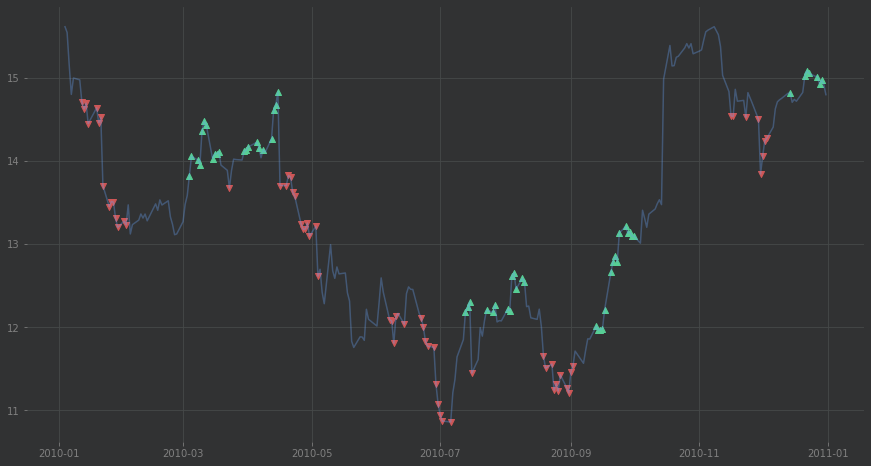

In [23]:
# We plot all the signal to be sure that they are correct
year = "2010"
idx_long = f.loc[f["position"] == 1].loc[year].index
idx_short = f.loc[f["position"] == -1].loc[year].index

# Adapt the size of the graph
plt.figure(figsize = (15, 8))

# Plot the points of the short signal in red
plt.scatter(f.loc[idx_short]["Adj Close"].index, f.loc[idx_short]["Adj Close"].loc[year], color = "#CE5757", marker = "v")

# Plot the points of the long signal in green
plt.scatter(f.loc[idx_long]["Adj Close"].index, f.loc[idx_long]["Adj Close"].loc[year], color = "#57CE95", marker = "^")

# Plot the rsi to make sure that the conditions are met
plt.plot(f["Adj Close"].loc[year].index, f["Adj Close"].loc[year], alpha = 0.35)

# Show the graph
plt.show()


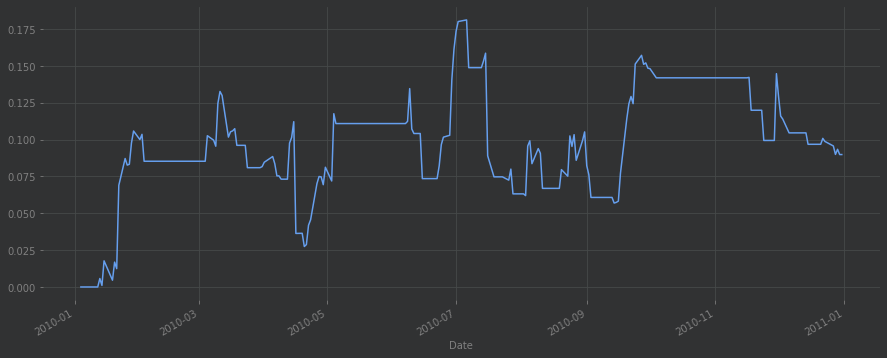

In [25]:
# Compute the percentage of variation of the asset
f["pct"] = f["Adj Close"].pct_change(1)

# Compute the return of the strategy
f["return"] = f["pct"] * (f["position"].shift(1))

f["return"].loc["2010"].cumsum().plot(figsize = (15, 6))

# Create a function to do RSI later

In [27]:
def RSI (val, neutral, window):
    """
        Output: the function gives the returns of RSI strategy
        Inputs: 
            - val: Datafram contains entry values of the stocks
            - neutral: value of neutrality, i.e. no action zone
            - window: rolling period for RSI
    """

    # Print Error if there is no column Adj Close in the dataframe
    if "Adj Close" not in val.columns:
        ValueError("We need to have a columns named Adj Close because all the computations are performed on this column")

    # Initialize the rsi column
    val["rsi"] = ta.momentum.RSIIndicator(val["Adj Close"], window = window).rsi()

    """ Long signal"""

    overbuy = 70
    neutral_buy = 50 + neutral

    # Put NaN values in the signal long column
    val["signal long"] = np.nan
    val["yesterday_rsi"] = val["rsi"].shift(1)

    # We need to define when to open the Long signal (RSI yesterday < 55 and RSI today > 55)
    val.loc[(val["rsi"] > neutral_buy) & (val["yesterday_rsi"] < neutral_buy), "signal_long"] = 1

    # We need to define when to close the Long signal (RSI yesterday > 55 and RSI today < 55) False signal
    val.loc[(val["rsi"] < neutral_buy) & (val["yesterday_rsi"] > neutral_buy), "signal_long"] = 0

    # We need to close the Long signal when the rsi value passing the overbought threshold (RSI yesterday > 70 and RSI today < 70) Over buy signal
    val.loc[(val["rsi"] < overbuy) & (val["yesterday_rsi"] > overbuy), "signal_long"] = 0


    """ Short signal"""

    oversell = 30
    neutral_sell = 50 - neutral

    # Put NaN values for the signal short columns
    val["signal_short"] = np.nan
    val["yesterday_rsi"] = val["rsi"].shift(1)

    # We need to define when to open the Short signal (RSI yesterday > 45 and RSI today < 45)
    val.loc[(val["rsi"] < neutral_sell) & (val["yesterday_rsi"] > neutral_sell), "signal_short"] = -1

    # We need to define when to close the Short signal (RSI yesterday < 45 and RSI today > 45) False signal
    val.loc[(f["rsi"] > neutral_sell) & (val["yesterday_rsi"] < neutral_sell), "signal_short"] = 0

    # We need to close the Short signal when the rsi value passing the oversell threshold (RSI yesterday < 30 and RSI today > 70) Over Sell signal
    val.loc[(val["rsi"] > oversell) & (val["yesterday_rsi"] < oversell), "signal_short"] = 0

    """ compute the return """
    # Compute the percentage of variation of the asset
    val["pct"] = val["Adj Close"].pct_change(1)

    # Compute the positions
    val["Position"] = (val["signal_short"].fillna(method = "ffill") + val["signal_long"].fillna(method = "ffill"))

    # Compute the return of the strategy
    val["return"] = val["pct"] * val["position"].shift(1)

    return val["return"]

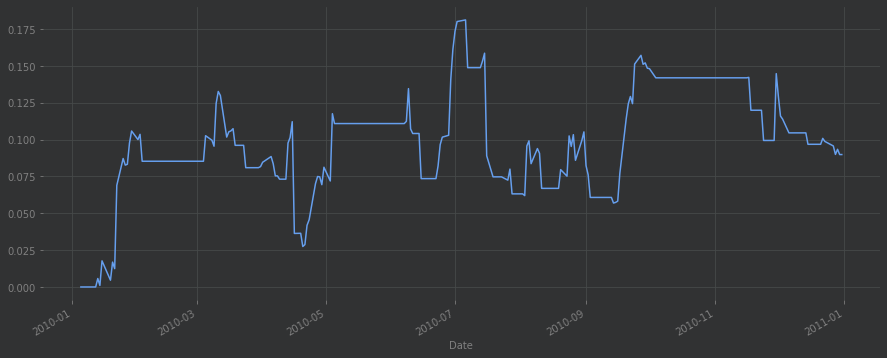

In [28]:
RSI(f.loc["2010"], 5, 14).cumsum().plot(figsize = (15, 6))